Optimal Policy (0=up,1=down,2=left,3=right):
[[1 1 1 3]
 [3 1 1 1]
 [3 3 3 1]
 [0 0 0 0]]


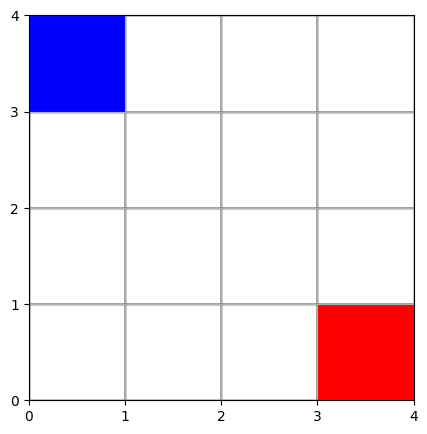

Agent at (1, 0), reward: -0.01


<Figure size 640x480 with 0 Axes>

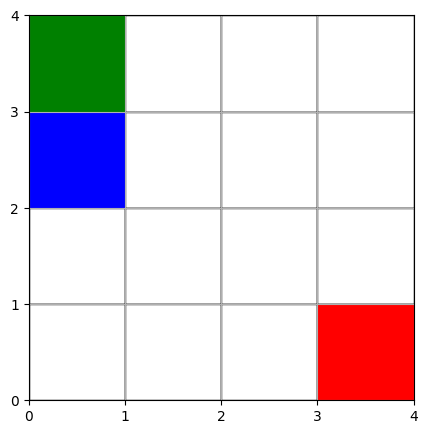

Agent at (1, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

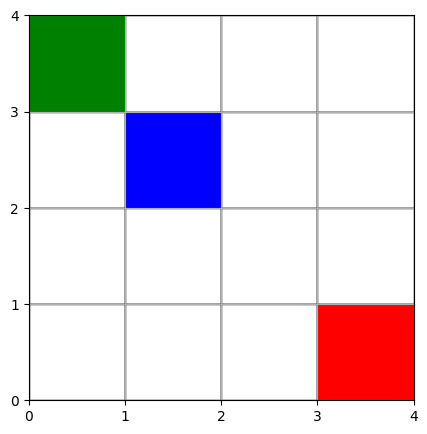

Agent at (2, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

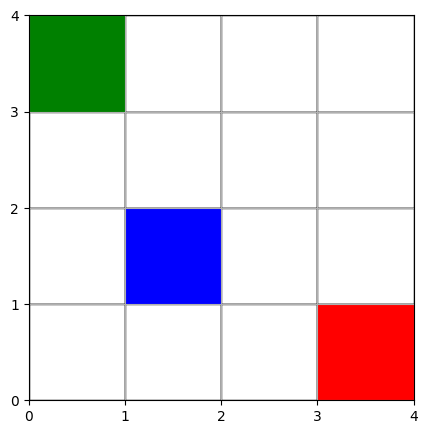

Agent at (2, 2), reward: -0.01


<Figure size 640x480 with 0 Axes>

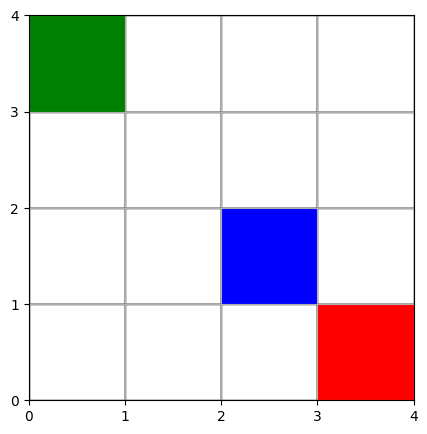

Agent at (2, 3), reward: -0.01


<Figure size 640x480 with 0 Axes>

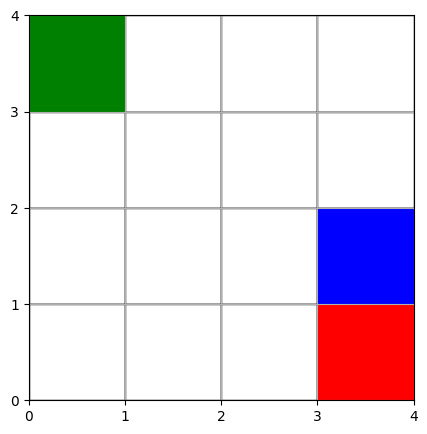

Agent at (3, 3), reward: 1.0


<Figure size 640x480 with 0 Axes>

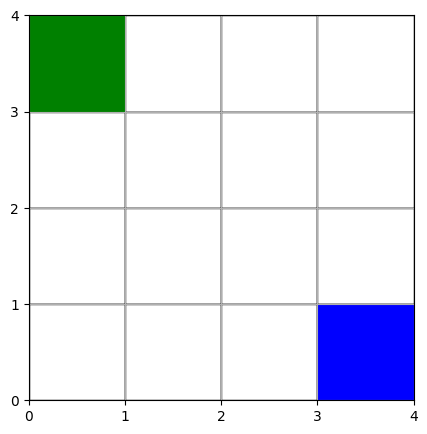

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# ---------------- GRIDWORLD WITH PATCHES ----------------
class GridWorld:
    def __init__(self, size=4, start=(0,0), goal=(3,3)):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = {
            0: (-1, 0),  # up
            1: (1, 0),   # down
            2: (0, -1),  # left
            3: (0, 1)    # right
        }

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        dx, dy = self.actions[action]
        x, y = self.state
        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < self.size and 0 <= new_y < self.size:
            self.state = (new_x, new_y)

        if self.state == self.goal:
            return self.state, 1.0, True
        else:
            return self.state, -0.01, False

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size+1))
        ax.set_yticks(range(self.size+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.3)
        plt.clf()

# ---------------- Q-LEARNING ----------------
def q_learning(env, num_episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # state-action values

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # ε-greedy action selection
            if random.random() < epsilon:
                action = np.random.choice([0,1,2,3])
            else:
                action = np.argmax(Q[state[0], state[1]])

            next_state, reward, done = env.step(action)

            # Q-Learning update
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])

            state = next_state

    # Derive policy
    policy = np.argmax(Q, axis=2)
    return Q, policy

# ---------------- RUN POLICY VISUAL ----------------
def run_policy_visual(env, policy):
    state = env.reset()
    done = False
    while not done:
        env.render()
        action = policy[state[0], state[1]]
        state, reward, done = env.step(action)
        print(f"Agent at {state}, reward: {reward}")
    # final position
    env.render()
    plt.close()

# ---------------- MAIN ----------------
env = GridWorld()
Q, policy = q_learning(env, num_episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1)
print("Optimal Policy (0=up,1=down,2=left,3=right):")
print(policy)

run_policy_visual(env, policy)


Optimal Policy (0=up,1=down,2=left,3=right):
[[3 1 1 1]
 [1 1 1 1]
 [3 3 3 1]
 [3 3 3 0]]


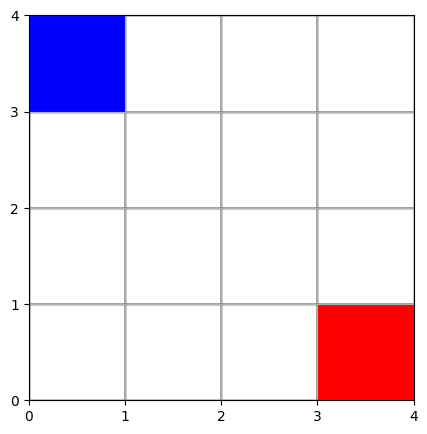

Agent at (0, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

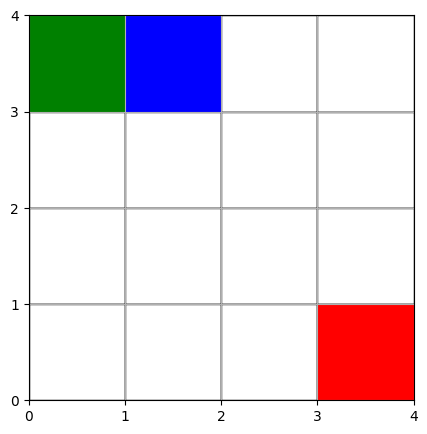

Agent at (1, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

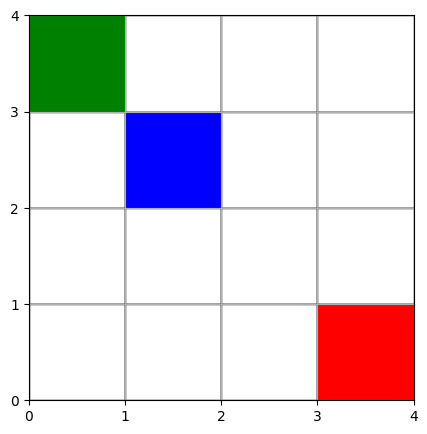

Agent at (2, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

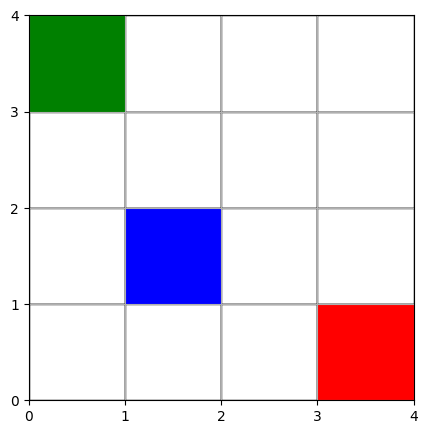

Agent at (2, 2), reward: -0.01


<Figure size 640x480 with 0 Axes>

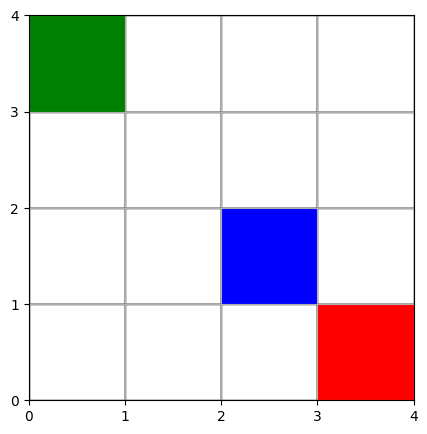

Agent at (2, 3), reward: -0.01


<Figure size 640x480 with 0 Axes>

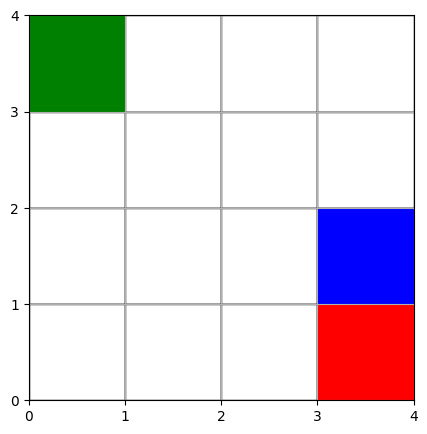

Agent at (3, 3), reward: 1.0


<Figure size 640x480 with 0 Axes>

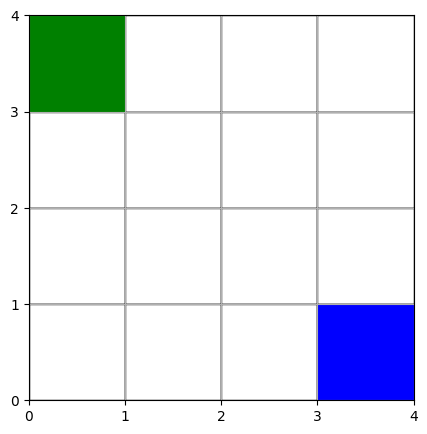

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# ---------------- GRIDWORLD WITH PATCHES ----------------
class GridWorld:
    def __init__(self, size=4, start=(0,0), goal=(3,3)):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = {
            0: (-1, 0),  # up
            1: (1, 0),   # down
            2: (0, -1),  # left
            3: (0, 1)    # right
        }

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        dx, dy = self.actions[action]
        x, y = self.state
        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < self.size and 0 <= new_y < self.size:
            self.state = (new_x, new_y)

        if self.state == self.goal:
            return self.state, 1.0, True
        else:
            return self.state, -0.01, False

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size+1))
        ax.set_yticks(range(self.size+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.3)
        plt.clf()

# ---------------- Q-LEARNING ----------------
def q_learning(env, num_episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # state-action values

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # ε-greedy action selection
            if random.random() < epsilon:
                action = np.random.choice([0,1,2,3])
            else:
                action = np.argmax(Q[state[0], state[1]])

            next_state, reward, done = env.step(action)

            # Q-Learning update
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])

            state = next_state

    # Derive policy
    policy = np.argmax(Q, axis=2)
    return Q, policy

# ---------------- RUN POLICY VISUAL ----------------
def run_policy_visual(env, policy):
    state = env.reset()
    done = False
    while not done:
        env.render()
        action = policy[state[0], state[1]]
        state, reward, done = env.step(action)
        print(f"Agent at {state}, reward: {reward}")
    # final position
    env.render()
    plt.close()

# ---------------- MAIN ----------------
env = GridWorld()
Q, policy = q_learning(env, num_episodes=10000, alpha=0.1, gamma=0.9, epsilon=0.1)
print("Optimal Policy (0=up,1=down,2=left,3=right):")
print(policy)

run_policy_visual(env, policy)


Optimal Policy (0=up,1=down,2=left,3=right):
[[1 1 1 1]
 [3 1 1 1]
 [3 3 3 1]
 [3 3 3 0]]


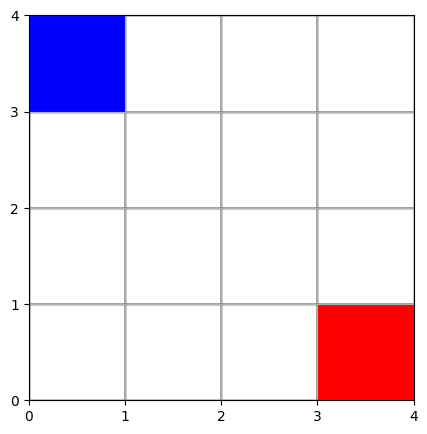

Agent at (1, 0), reward: -0.01


<Figure size 640x480 with 0 Axes>

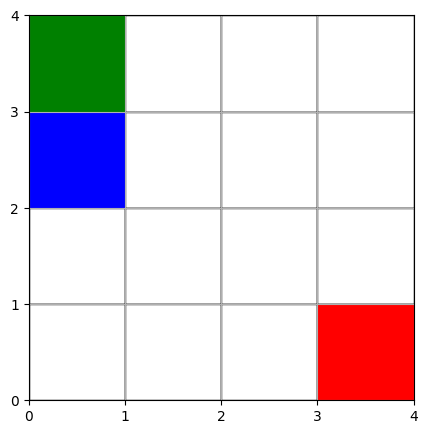

Agent at (1, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

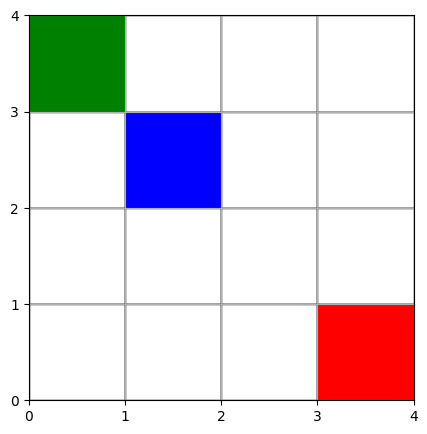

Agent at (2, 1), reward: -0.01


<Figure size 640x480 with 0 Axes>

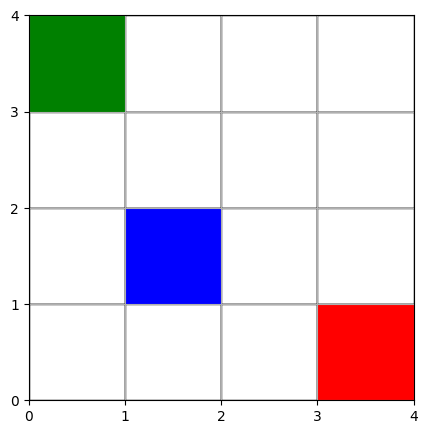

Agent at (2, 2), reward: -0.01


<Figure size 640x480 with 0 Axes>

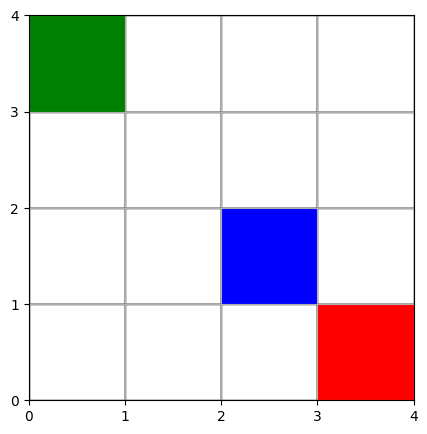

Agent at (2, 3), reward: -0.01


<Figure size 640x480 with 0 Axes>

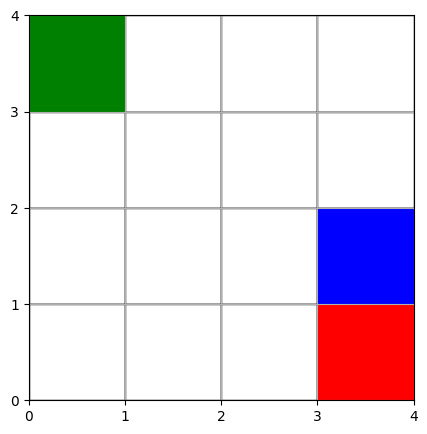

Agent at (3, 3), reward: 1.0


<Figure size 640x480 with 0 Axes>

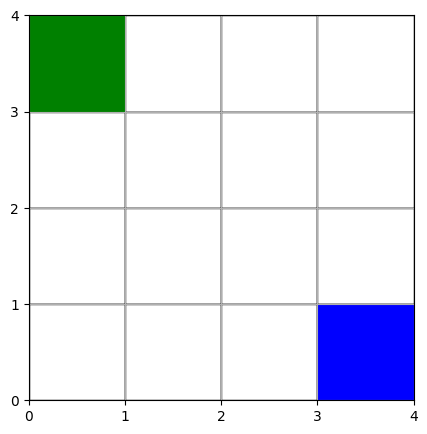

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# ---------------- GRIDWORLD WITH PATCHES ----------------
class GridWorld:
    def __init__(self, size=4, start=(0,0), goal=(3,3)):
        self.size = size
        self.start = start
        self.goal = goal
        self.state = start
        self.actions = {
            0: (-1, 0),  # up
            1: (1, 0),   # down
            2: (0, -1),  # left
            3: (0, 1)    # right
        }

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        dx, dy = self.actions[action]
        x, y = self.state
        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < self.size and 0 <= new_y < self.size:
            self.state = (new_x, new_y)

        if self.state == self.goal:
            return self.state, 1.0, True
        else:
            return self.state, -0.01, False

    def render(self):
        fig, ax = plt.subplots(figsize=(5,5))
        for i in range(self.size):
            for j in range(self.size):
                rect = patches.Rectangle((j, self.size-1-i), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
                ax.add_patch(rect)

        sx, sy = self.start
        gx, gy = self.goal
        ax.add_patch(patches.Rectangle((sy, self.size-1-sx), 1, 1, facecolor='green'))
        ax.add_patch(patches.Rectangle((gy, self.size-1-gx), 1, 1, facecolor='red'))
        ax.add_patch(patches.Rectangle((self.state[1], self.size-1-self.state[0]), 1, 1, facecolor='blue'))

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size+1))
        ax.set_yticks(range(self.size+1))
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show(block=False)
        plt.pause(0.3)
        plt.clf()

# ---------------- Q-LEARNING ----------------
def q_learning(env, num_episodes=5000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # state-action values

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # ε-greedy action selection
            if random.random() < epsilon:
                action = np.random.choice([0,1,2,3])
            else:
                action = np.argmax(Q[state[0], state[1]])

            next_state, reward, done = env.step(action)

            # Q-Learning update
            best_next_action = np.argmax(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action])

            state = next_state

    # Derive policy
    policy = np.argmax(Q, axis=2)
    return Q, policy

# ---------------- RUN POLICY VISUAL ----------------
def run_policy_visual(env, policy):
    state = env.reset()
    done = False
    while not done:
        env.render()
        action = policy[state[0], state[1]]
        state, reward, done = env.step(action)
        print(f"Agent at {state}, reward: {reward}")
    # final position
    env.render()
    plt.close()

# ---------------- MAIN ----------------
env = GridWorld()
Q, policy = q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1)
print("Optimal Policy (0=up,1=down,2=left,3=right):")
print(policy)

run_policy_visual(env, policy)
